In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from random import randrange, uniform

In [148]:
# Load Data - Train Data
Train_Data=pd.read_csv('train_cab.csv', header = 0 )

In [149]:
Train_Data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [150]:
Train_Data=Train_Data.drop(['pickup_datetime'],axis=1)
Train_Data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [151]:
#Eliminate rows where the pickup and drop location points are same

Train_Data=Train_Data[np.logical_and(Train_Data['pickup_longitude'] != Train_Data['dropoff_longitude'],
                                     Train_Data['pickup_latitude'] != Train_Data['dropoff_latitude'])]

In [152]:
Train_Data.dtypes

fare_amount           object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [153]:
#replace 0 with NA in the variables and convert the data wherever required for further operations

Train_Data['fare_amount']= Train_Data['fare_amount'].apply(pd.to_numeric, errors='coerce')
Train_Data['fare_amount']= Train_Data['fare_amount'].replace({0:np.nan}) 
Train_Data['passenger_count']=Train_Data['passenger_count'].fillna(0)
Train_Data['passenger_count']= Train_Data['passenger_count'].astype(int)
Train_Data['passenger_count']=Train_Data['passenger_count'].replace({0: np.nan})
Train_Data['pickup_longitude']= Train_Data['pickup_longitude'].replace({0:np.nan})
Train_Data['pickup_latitude']= Train_Data['pickup_latitude'].replace({0:np.nan})
Train_Data['dropoff_longitude']= Train_Data['dropoff_longitude'].replace({0:np.nan})
Train_Data['dropoff_latitude']= Train_Data['dropoff_latitude'].replace({0:np.nan})

In [154]:
Train_Data.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [155]:
Train_Data.shape

(15603, 6)

In [156]:
Train_Data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0


## Missing value analysis

In [157]:
Train_Data.isnull().sum()

fare_amount           24
pickup_longitude      12
pickup_latitude       12
dropoff_longitude     10
dropoff_latitude       9
passenger_count      112
dtype: int64

## Missing Value imputation

In [158]:
#Create missing value, a small test to identify which method is good for imputation

Train_Data["pickup_longitude"].loc[50]

-73.985582

In [159]:
Train_Data["pickup_longitude"].loc[50] = np.nan
Train_Data["pickup_longitude"].loc[50]

nan

In [160]:
Train_DataM=Train_Data.copy()
Train_DataMe=Train_Data.copy()
Train_DataKNN=Train_Data.copy()


In [161]:
#Mean Imputation
Train_DataM['pickup_longitude'] = Train_Data['pickup_longitude'].fillna(Train_Data['pickup_longitude'].mean())

Train_DataM["pickup_longitude"].loc[50]

-73.91159401975028

In [162]:
#Median Imputation
Train_DataMe['pickup_longitude'] = Train_Data['pickup_longitude'].fillna(Train_Data['pickup_longitude'].median())

Train_DataMe["pickup_longitude"].loc[50]

-73.9820605

In [163]:
#KNN imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

Train_DataKNN = pd.DataFrame(imputer.fit_transform(Train_Data),columns = Train_Data.columns)

Train_DataKNN["pickup_longitude"].loc[50]

-73.977708

In [164]:
#imputation method 
#Actual value = -73.985582
#Mean = -73.91159336554888
#Median = -73.9820605
#KNN = -73.977708

In [165]:
#As it is found Mean is very close to original method we will proceed with imputation via median
Train_Data['fare_amount'] = Train_Data['fare_amount'].fillna(Train_Data['fare_amount'].median())
Train_Data['pickup_longitude']= Train_Data['pickup_longitude'].fillna(Train_Data['pickup_longitude'].median())
Train_Data['pickup_latitude']= Train_Data['pickup_latitude'].fillna(Train_Data['pickup_latitude'].median())
Train_Data['dropoff_longitude']= Train_Data['dropoff_longitude'].fillna(Train_Data['dropoff_longitude'].median())
Train_Data['dropoff_latitude']= Train_Data['dropoff_latitude'].fillna(Train_Data['dropoff_latitude'].median())


#And for category variables imputation is done with mode
Train_Data['passenger_count'] = Train_Data['passenger_count'].fillna(int(Train_Data['passenger_count'].mode()))

In [166]:
Train_Data=Train_Data.dropna()

In [167]:
#conert into proper data type
convert_dic={'fare_amount' : 'float','passenger_count': 'int'}
Train_Data=Train_Data.astype(convert_dic)

In [168]:
Train_Data.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int32
dtype: object

## Outlier Analysis

In [169]:
#Take a copy of original dataset

df = Train_Data.copy()
Train_Data = Train_Data.copy()

In [170]:
df['fare_amount'].describe()

count    15603.000000
mean        15.118135
std        436.467381
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [171]:
# irregular fare_amount are converted to NA as min -3.000000 & max 54343.000000

Train_Data.loc[Train_Data['fare_amount']<0 , 'fare_amount']=np.nan
Train_Data.loc[Train_Data['fare_amount'] > 30, 'fare_amount']=np.nan
Train_Data=Train_Data.dropna()

In [172]:
#irregular passenger counts or those wgich are greater then 8 convertet to NaN
Train_Data.loc[Train_Data['passenger_count'] > 8,'passenger_count'] = np.nan

In [173]:
#save numeric data names
coutliers = [ 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
for list in coutliers:
    #Detect and replace with NA
    #Extract quartiles
    q75, q25 = np.percentile(Train_Data[list], [75 ,25])

    #Calculate IQR
    iqr = q75 - q25
   
    # #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)

    # #Replace with NA
    Train_Data.loc[Train_Data[list] < minimum,list] = np.nan
    Train_Data.loc[Train_Data[list] > maximum,list] = np.nan

    # #Calculate missing value
    missing_val = pd.DataFrame(Train_Data.isnull().sum())

In [174]:
#As Median is the best method, we impute missing values/ in this case outlier values with mean

Train_Data['pickup_longitude'] = Train_Data['pickup_longitude'].fillna(Train_Data['pickup_longitude'].median())
Train_Data['pickup_latitude'] = Train_Data['pickup_latitude'].fillna(Train_Data['pickup_latitude'].median())
Train_Data['dropoff_longitude'] = Train_Data['dropoff_longitude'].fillna(Train_Data['dropoff_longitude'].median())
Train_Data['dropoff_latitude'] = Train_Data['dropoff_latitude'].fillna(Train_Data['dropoff_latitude'].median())

#imputed with mode for categorical variables
Train_Data['passenger_count'] = Train_Data['passenger_count'].fillna(int(Train_Data['passenger_count'].mode()))

In [175]:
Train_Data.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [176]:
#convert the data type of categorical variable passenger count
Train_Data['passenger_count']=Train_Data['passenger_count'].astype('int')
Train_Data['passenger_count']=Train_Data['passenger_count'].astype('category')

In [177]:
Train_Data.dtypes

fare_amount           float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count      category
dtype: object

In [178]:
##Correlation analysis
#Correlation plot
numeric=['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
Train_Data_corr = Train_Data.loc[:,numeric]

                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000         -0.050994        -0.056726   
pickup_longitude     -0.050994          1.000000         0.668476   
pickup_latitude      -0.056726          0.668476         1.000000   
dropoff_longitude     0.042614          0.362670         0.292755   
dropoff_latitude     -0.074183          0.318353         0.442791   

                   dropoff_longitude  dropoff_latitude  
fare_amount                 0.042614         -0.074183  
pickup_longitude            0.362670          0.318353  
pickup_latitude             0.292755          0.442791  
dropoff_longitude           1.000000          0.596851  
dropoff_latitude            0.596851          1.000000  


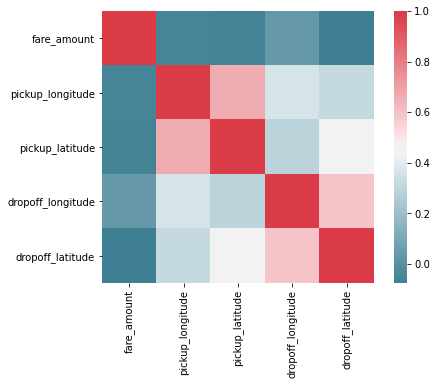

In [179]:
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = Train_Data_corr.corr()
print(corr)

#Plotted using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [180]:
#eliminate all data with the pickup and drop location points as same

Train_Data=Train_Data[np.logical_and(Train_Data['pickup_longitude'] != Train_Data['dropoff_longitude'],
                                     Train_Data['pickup_latitude'] != Train_Data['dropoff_latitude'])]

## Model Development

# Linear Regression

In [181]:
Train_Data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.982628,40.721319,-73.981637,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [182]:
dflinear = Train_Data.copy()
dflinear.shape

(14795, 6)

In [183]:
# Split into X (Independent) and Y (predicted)
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [184]:
# Split for rows
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =     \
train_test_split (X, Y, test_size = 0.3, random_state=1234)

In [185]:
# train the Simple Linear Regression
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()

In [213]:
# Provide the training Data
model=std_reg.fit(x_train, y_train)

In [214]:
# predict the results
y_predict = std_reg.predict(x_test)

In [215]:
# Get the R-Squared 
mlr_score = std_reg.score(x_test, y_test)
print(mlr_score)

-0.00018537948060037834


In [216]:
# Coefficient and Intercept
mlr_coefficient = std_reg.coef_
mlr_intercept = std_reg.intercept_

In [217]:
print(mlr_coefficient)
print(mlr_intercept)

[-3.58406018e-05 -1.02269506e-01 -4.14439802e-03 -2.98472213e-02
 -1.30798712e-01]
-1.9636672802751174


In [218]:
from sklearn.metrics import mean_squared_error
import math

mlr_rmse = math.sqrt(mean_squared_error(y_test, y_predict))

In [219]:
mlr_rmse

79.95683167461739

In [209]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [211]:
mape(y_test,y_predict)

101.55736539730789

In [126]:
#We will go with MAPE we will not go with RMSE because we are not working with Timestamp value

In [200]:
import statsmodels.api as sm
model = sm.OLS(x_train.iloc[:, 0].astype(float), x_train.iloc[:, 1:12].astype(float)).fit()

In [201]:
model_lr_predict=model.predict(x_train.iloc[:, 1:12])

In [202]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              2.703
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                      0.0288
Time:                        17:06:05   Log-Likelihood:                         -83801.
No. Observations:               10922   AIC:                                  1.676e+05
Df Residuals:                   10918   BIC:                                  1.676e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_longitude     -0.7458      8.200     -0.091      0.928     -16.820      15.328
pickup_latitude      -0.0614      1.435     -0.043      0.966      -2.875       2.752
dropoff_longitude     0.2809      7.860      0.036      0.971     -15.125      15.687
dropoff_latitude     -0.3811      4.448     -0.086      0.932      -9.101       8.339
==============================================================================
Omnibus:                    44044.145   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      54169216586.784
Skew:                         104.431   Prob(JB):                         0.00
Kurtosis:                   10911.153   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Decision tree

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [53]:
dfDT= Train_Data.copy()

In [54]:
dfDT.shape

(14795, 6)

In [55]:
train1, test1 = train_test_split(Train_Data, test_size=0.2)

In [60]:
# Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=4).fit(train1.iloc[:, 1:7], train1.iloc[:,0],)

In [61]:
fit_DT

DecisionTreeRegressor(max_depth=4)

In [62]:
predictions_DT = fit_DT.predict(test1.iloc[:,1:7])

In [63]:
mape(test1.iloc[:,0], predictions_DT)

43.05074994315946

In [ ]:
#Accuracy: 56.95%
#Error : 43.05%

# Random forest

In [64]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [65]:

RF_model = RandomForestRegressor(n_estimators = 10).fit(train1.iloc[:, 1:7], train1.iloc[:,0])

In [66]:
RF_model

RandomForestRegressor(n_estimators=10)

In [67]:
RF_Predictions = RF_model.predict(test1.iloc[:, 1:7])

In [68]:
mape(test1.iloc[:,0], RF_Predictions)

24.49083548318774

In [ ]:
#Accuracy: 75%
#Error : 24.49%

# Prediction on test dataset

In [69]:
pred=(pd.read_csv('test.csv', header = 0 )).drop(columns="pickup_datetime")
pred.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982524,40.751260,-73.979654,40.746139,1
3,-73.981160,40.767807,-73.990448,40.751635,1
4,-73.966046,40.789775,-73.988565,40.744427,1


In [70]:
# Build model on the entire Train data
RF_model = RandomForestRegressor(n_estimators = 10).fit(Train_Data.iloc[:, 1:7], Train_Data.iloc[:,0])

#predict value
pred['fare_amount'] = RF_model.predict(pred.iloc[:, 0:6])

In [71]:
pred.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,-73.973320,40.763805,-73.981430,40.743835,1,8.44
1,-73.986862,40.719383,-73.998886,40.739201,1,8.74
2,-73.982524,40.751260,-73.979654,40.746139,1,5.48
3,-73.981160,40.767807,-73.990448,40.751635,1,6.92
4,-73.966046,40.789775,-73.988565,40.744427,1,14.63


In [72]:
#write output to csv

pred.to_csv("Predicted_Values.csv", index = False)